<a href="https://colab.research.google.com/github/fatemehghassemi/Deeplearning/blob/main/text_DR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/My Drive/Text_detection

/content/drive/My Drive/Text_detection


In [2]:
from keras.layers import Dense
%matplotlib inline
import keras
from keras.models import Sequential
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import scipy
import math
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


In [1]:
!pip install --upgrade scipy==1.2.2
!pip install --upgrade numpy==1.18

     |████████████████████████████████| 24.8 MB 39 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.5.0 requires numpy~=1.19.2, but you have numpy 1.18.0 which is incompatible.
kapre 0.3.5 requires numpy>=1.18.5, but you 

In [5]:
np.__version__

'1.19.5'

In [6]:
scipy.__version__

'1.2.2'

In [7]:
path_text='data/text/'
path_notext = 'data/no text/'

files = os.listdir(path_text)[1:]
files_notext = os.listdir(path_notext)[1:]

text_data = pd.DataFrame(np.empty((1,1024)))
non_text_data = pd.DataFrame(np.empty((1,1024)))

In [8]:
i=0
for images in files:
    img = np.asarray(Image.open(path_text+images).resize((32,32),Image.ANTIALIAS))
    text_data.loc[i,:] = img.ravel()
    i+=1
i=0
for images in files_notext:
    img = np.asarray(Image.open(path_notext+images).resize((32,32),Image.ANTIALIAS))
    non_text_data.loc[i,:] = img.ravel()
    i+=1

In [9]:
non_text_data['text_label']=0
text_data['text_label'] = 1
data = pd.concat([text_data,non_text_data])

In [10]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(data.iloc[:,:1024],data['text_label'],test_size=0.1)


In [11]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
train_x = sc_x.fit_transform(train_x)
test_x = sc_x.transform(test_x)

In [12]:
train_x1 = train_x.reshape((train_x.shape[0],32,32,1))
test_x1 = test_x.reshape((test_x.shape[0],32,32,1))

In [13]:
clf1 = Sequential()
clf1.add(Convolution2D(32,(3,3),input_shape=(32,32,1),activation='relu'))
clf1.add(MaxPooling2D(2,2))
clf1.add(Convolution2D(128,(3,3),activation='relu'))
clf1.add(MaxPooling2D(2,2))
clf1.add(Flatten())
clf1.add(Dense(activation='relu',units=500,kernel_initializer='uniform'))
clf1.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

clf1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
clf1.fit(train_x1,train_y,epochs=10)

Epoch 1/10
141/141 [==============================] - 43s 5ms/step - loss: 0.2698 - accuracy: 0.8904
Epoch 2/10
141/141 [==============================] - 1s 4ms/step - loss: 0.0812 - accuracy: 0.9710
Epoch 3/10
141/141 [==============================] - 1s 4ms/step - loss: 0.0724 - accuracy: 0.9729
Epoch 4/10
141/141 [==============================] - 1s 4ms/step - loss: 0.0310 - accuracy: 0.9874
Epoch 5/10
141/141 [==============================] - 1s 4ms/step - loss: 0.0173 - accuracy: 0.9949
Epoch 6/10
141/141 [==============================] - 1s 4ms/step - loss: 0.0210 - accuracy: 0.9908
Epoch 7/10
141/141 [==============================] - 1s 4ms/step - loss: 0.0090 - accuracy: 0.9973
Epoch 8/10
141/141 [==============================] - 1s 4ms/step - loss: 0.0096 - accuracy: 0.9969
Epoch 9/10
141/141 [==============================] - 1s 4ms/step - loss: 0.0057 - accuracy: 0.9990
Epoch 10/10
141/141 [==============================] - 1s 4ms/step - loss: 0.0206 - accuracy: 0.990

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred1 = np.around(clf1.predict(test_x1))

print('accuracy_score:',accuracy_score(y_pred1,test_y))

accuracy_score: 0.9939879759519038


In [15]:
confusion_matrix(test_y,y_pred1)

array([[246,   2],
       [  1, 250]])

Bright text on dark background? Press Y/y for yes and any other key for no.y


<Figure size 432x288 with 0 Axes>

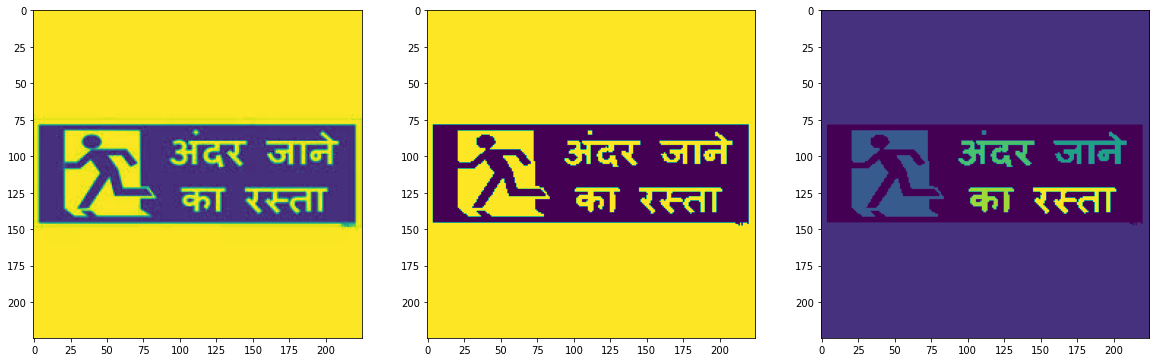

In [16]:
img=cv2.imread('data/test images/test_6.jpg',0)
a = input('Bright text on dark background? Press Y/y for yes and any other key for no.' )
if a=='y' or a=='Y':
    otsu_1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
#     th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,25,3)
else:
    otsu_1 = 255-cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
#     th2 = 255- cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,25,3)


# connected components
cc  = cv2.connectedComponents(np.uint8(otsu_1))[1]

# creating imgage for every single label in the connected components
con_img = {}
for label in np.unique(cc[cc>0]):
    image = np.zeros(cc.shape)
    indices = np.where(cc==label)
    image[indices] = 1
    con_img[label] = image
    

plt.savefig('plot_3.jpg')

plt.figure(figsize=[20,10])
plt.subplot(1,3,1)
plt.imshow(img)

plt.subplot(1,3,2)
plt.imshow(otsu_1)

plt.subplot(1,3,3)
plt.imshow(cc)


In [19]:
pip install Pillow

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning:     `imresize` is deprecated!
    `imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
    Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning:     `imresize` is deprecated!
    `imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
    Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning:     `imresize` is deprecated!
    `imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
    Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning:     `imresize` is deprecated!
    `imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
    Use Pillow inst

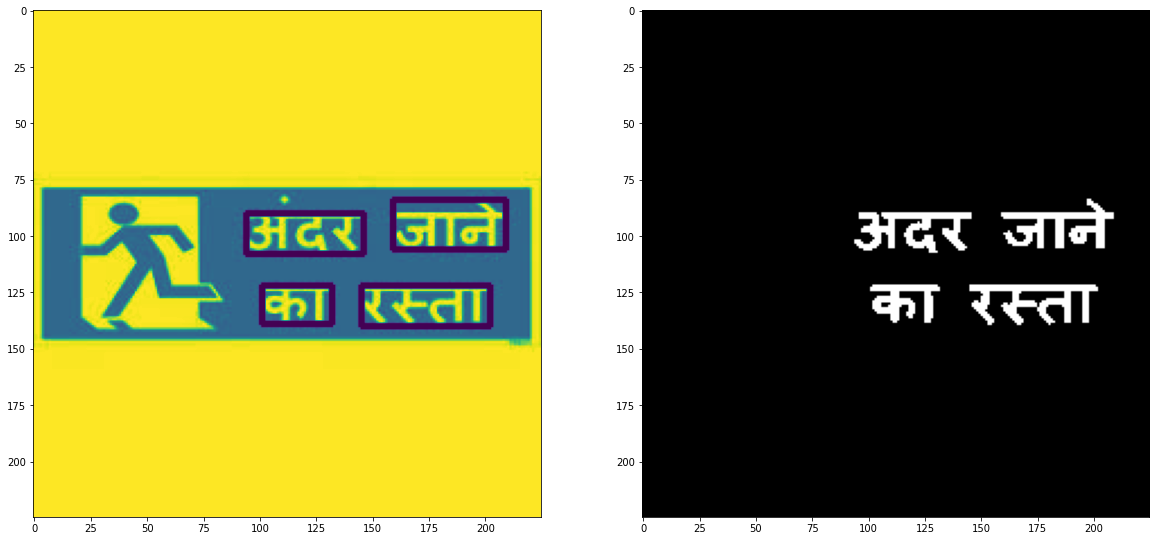

In [17]:
tot1=0
i=1
mask = {}
i=1
for elem in con_img.keys():
    x,y,w,h = cv2.boundingRect(np.uint8(con_img[elem]))
    imng = img[y:y+h,x:x+w]
    imng =  scipy.misc.imresize(imng,(32,32)).ravel().reshape(1,1024)
    imng = sc_x.transform(imng)
    imng = imng.reshape((1,32,32,1))
#     print(elem,np.around(classifier.predict(imng)))
    if np.around(clf1.predict(imng))==1.0:
#         print('yuhoo')
        tot1+=con_img[elem]
#         mask[i]=con_img[elem]
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        i+=1
        
plt.figure(figsize=[20,20])
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(tot1,'gray')

# **Text from the Image using Tesseract**

In [18]:
!pip install pytesseract


  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14071 sha256=d590f5dd3984beba62d92dd2f4336f6eb3946d21b49028e2143b734401f18449
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract


In [23]:

import cv2 
import pytesseract 

# Read image from which text needs to be extracted 
img = cv2.imread("a.png") 
  
# Preprocessing the image starts 
  
# Convert the image to gray scale 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
# Performing OTSU threshold 
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV) 
  
# Specify structure shape and kernel size.  
# Kernel size increases or decreases the area  
# of the rectangle to be detected. 
# A smaller value like (10, 10) will detect  
# each word instead of a sentence. 
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18)) 
  
# Appplying dilation on the threshold image 
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1) 
  
# Finding contours 
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,  
                                                 cv2.CHAIN_APPROX_NONE) 
  
# Creating a copy of image 
im2 = img.copy() 

  
# Looping through the identified contours 
# Then rectangular part is cropped and passed on 
# to pytesseract for extracting text from it 
# Extracted text is then written into the text file 


In [24]:
for cnt in contours: 
    x, y, w, h = cv2.boundingRect(cnt) 
      
    # Drawing a rectangle on copied image 
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2) 
      
    # Cropping the text block for giving input to OCR 
    cropped = im2[y:y + h, x:x + w] 

    # Apply OCR on the cropped image 
    text = pytesseract.image_to_string(cropped) 
      
print(text)

In [21]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,398 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl